In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url: str, housing_path: str):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH)

In [3]:
import pandas as pd

def load_housing_data(housing_path: str):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data(housing_path = HOUSING_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Plot a histogram

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

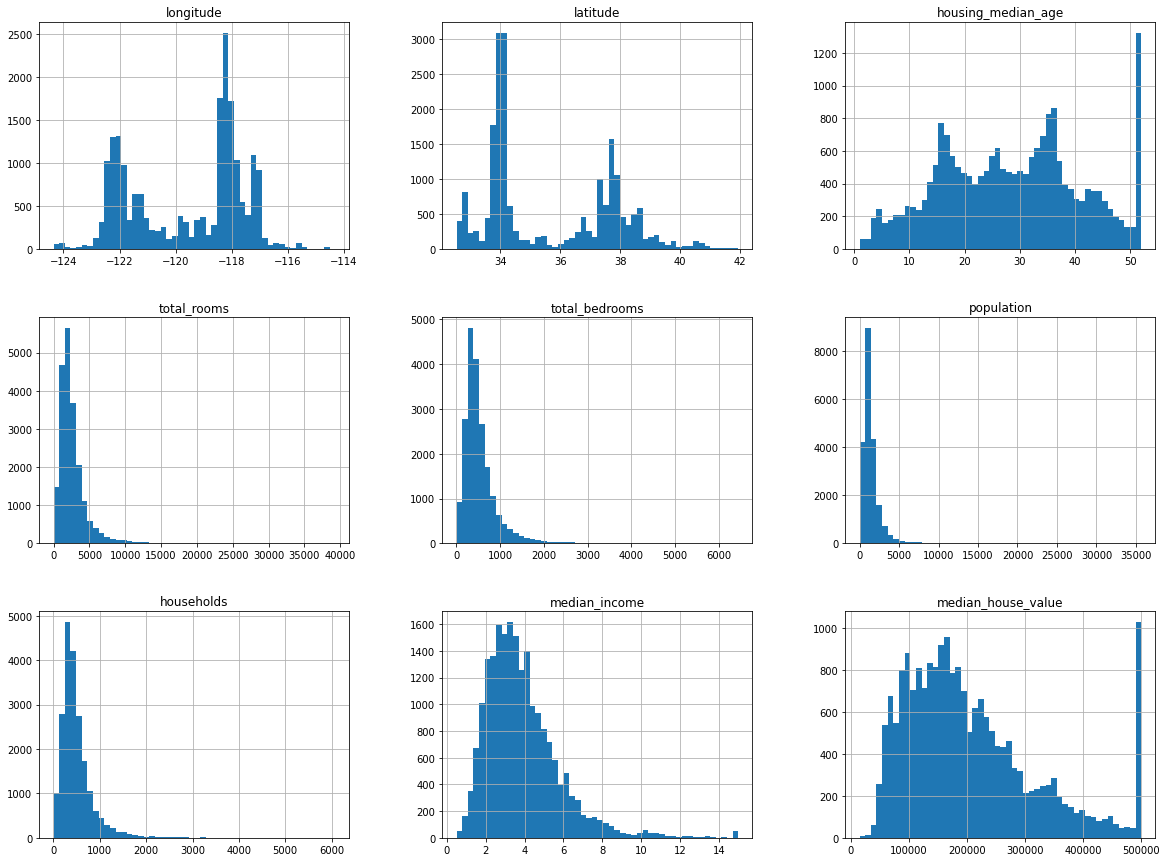

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 15))

### Create a Test Set

In [13]:
import numpy as np


def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


train_set, test_set = split_train_test(housing, 0.2)

print(f'Train set size: {len(train_set)}')
print(f'Test set size: {len(test_set)}')

Train set size: 16512
Test set size: 4128


### Hashing
>To have a stable train/test split even after updating the dataset,
a common solution is to use each instance’s identiﬁer to decide whether
or not it should go in the test set (assuming instances have a unique and
immutable identiﬁer). For example, you could compute a hash of each
instance’s identiﬁer and put that instance in the test set if the hash is
lower than or equal to 20% of the maximum hash value. This ensures that
the test set will remain consistent across multiple runs, even if you
refresh the dataset. The new test set will contain 20% of the new
instances, but it will not contain any instance that was previously in the
training set.

Here is a possible implementation:

In [14]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Add an identifier column

In [15]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

print(f'Train set size: {len(train_set)}')
print(f'Test set size: {len(test_set)}')

Train set size: 16512
Test set size: 4128


### Use scitikit-learn implemented functions

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f'Train set size: {len(train_set)}')
print(f'Test set size: {len(test_set)}')

Train set size: 16512
Test set size: 4128


### Stratified sampling

> Suppose you chatted with experts who told you that the median income is
a very important attribute to predict median housing prices. You may
want to ensure that the test set is representative of the various
categories of incomes in the whole dataset. Since the median income is a
continuous numerical attribute, you ﬁrst need to create an income
category attribute. Let’s look at the median income histogram more
closely (back in Figure 2-8): most median income values are clustered
around 1.5 to 6 (i.e., \\$15,000–\\$60,000), but some median incomes go far
beyond 6. It is important to have a suﬀicient number of instances in your
dataset for each stratum, or else the estimate of a stratum’s importance
may be biased. This means that you should not have too many strata, and
each stratum should be large enough. The following code uses the
pd.cut() function to create an income category attribute with ﬁve
categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less
than \\$15,000), category 2 from 1.5 to 3, and so on:

<AxesSubplot:>

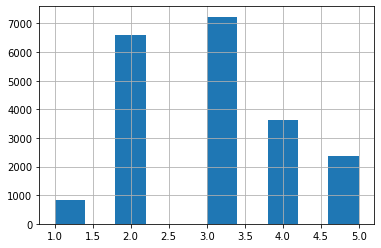

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Check if it worked. Check proportions in test set:

In [19]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


Compare proportions between stratified and not stratified sampling

In [28]:
# get test set again, now with income_cat column
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

def get_props(dataset):
    return dataset.get("income_cat").value_counts() / len(dataset)

overall_prop = get_props(housing)
stratified_prop = get_props(strat_test_set)
random_prop = get_props(test_set)

In [35]:
pd.DataFrame({"Overall": overall_prop,
             "Stratified": stratified_prop,
             "Random": random_prop,
             "Rand. %error": overall_prop / random_prop,
             "Strat. %error": overall_prop / stratified_prop})

,Overall,Stratified,Random,Rand. %error,Strat. %error
3,0.350581,0.350533,0.358527,0.977838,1.000138
2,0.318847,0.318798,0.324370,0.982972,1.000152
4,0.176308,0.176357,0.167393,1.053256,0.999725
5,0.114438,0.114583,0.109496,1.045133,0.998732
1,0.039826,0.039729,0.040213,0.990361,1.002439


In [36]:
# remove income_cat
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Visualize Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

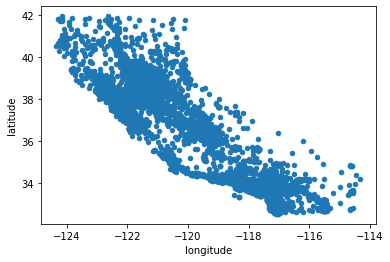

In [37]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

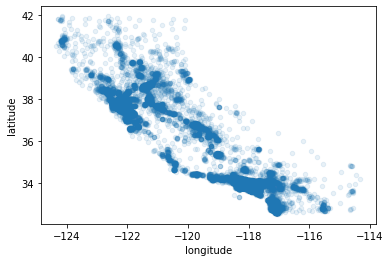

In [38]:
# add alpha
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

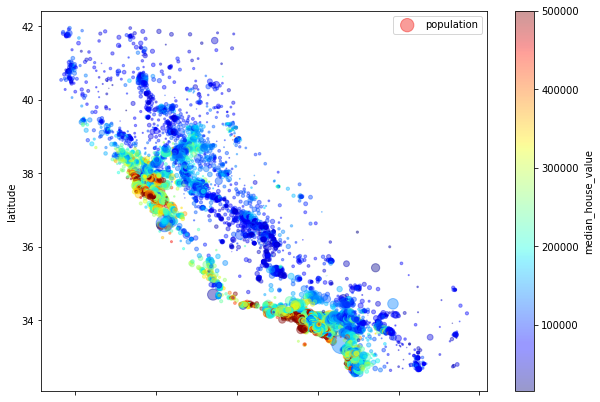

In [39]:
# add colors
housing.plot(kind="scatter", 
             x="longitude", 
             y="latitude",
             alpha=0.4,
            s=housing["population"]/100,
            label="population",
            figsize=(10,7),
            c="median_house_value",
            cmap=plt.get_cmap("jet"),
            colorbar=True)
plt.legend()